In [7]:
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from pybpl.library import Library

In [9]:
lib = Library(lib_dir='../../../lib_data/')
# get mu's and cov's
Mu = lib.shape['mu'].numpy()
Cov = lib.shape['Sigma'].numpy()

scales_theta = lib.scale['theta']
scales_con = scales_theta[:,0]  # gamma concentration
# NOTE: PyTorch gamma dist uses rate parameter, which is inv of scale
scales_rate = 1 / scales_theta[:,1]  # gamma rate

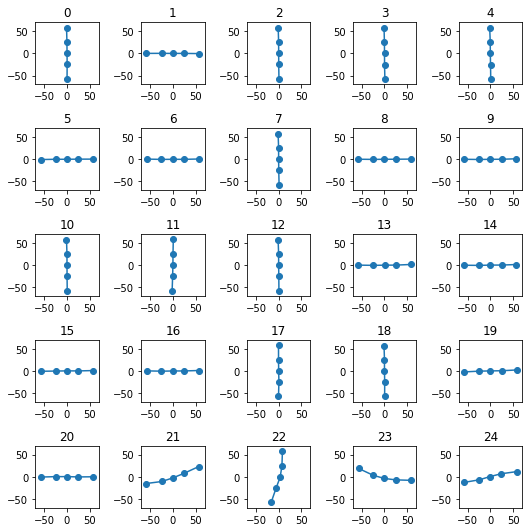

In [13]:
# visualize some of the means
nrow = 5
ncol = 5
fig, axes = plt.subplots(nrow,ncol,figsize=(1.5*ncol, 1.5*nrow))
for i in range(nrow):
    for j in range(ncol):
        ix = i*ncol + j
        cpts = Mu[ix].reshape(5,2)
        axes[i,j].plot(cpts[:,0], cpts[:,1])
        axes[i,j].scatter(cpts[:,0], cpts[:,1])
        axes[i,j].set_xlim(-70,70)
        axes[i,j].set_ylim(-70,70)
        axes[i,j].set_title(ix)
plt.tight_layout()
plt.show()

In [4]:
with open('../substroke_dict.p', 'rb') as fp:
    ss_dict = pickle.load(fp)

with open('../spline_dict.p', 'rb') as fp:
    spline_dict = pickle.load(fp)

In [5]:
def flatten_spline_dict(ss_dict, spline_dict):
    splines = []
    n_alpha = len(ss_dict)
    for a in range(n_alpha):
        alphabet = ss_dict[a]
        n_char = len(alphabet)
        for c in range(n_char):
            char = alphabet[c]
            n_rend = len(char)
            for r in range(n_rend):
                rendition = char[r]
                n_stroke = len(rendition)
                for s in range(n_stroke):
                    stroke = rendition[s]
                    n_substrokes = len(stroke)
                    for ss in range(n_substrokes):
                        num_steps = len(stroke[ss])
                        if num_steps >= 10:
                            splines.append(spline_dict[a][c][r][s][ss])
                            
    return np.asarray(splines, dtype=np.float32)

In [6]:
splines = flatten_spline_dict(ss_dict, spline_dict)

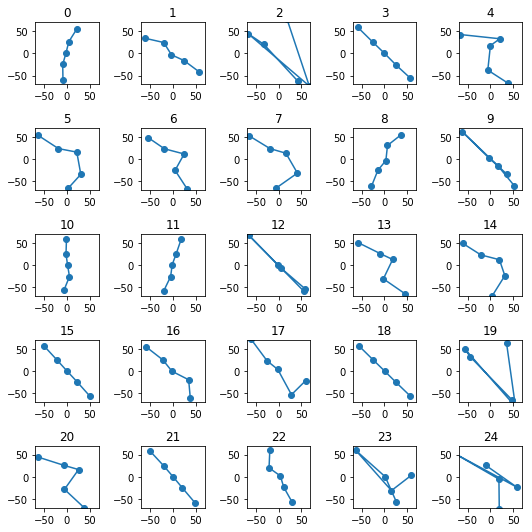

In [15]:
# visualize some of the splines
nrow = 5
ncol = 5
fig, axes = plt.subplots(nrow,ncol,figsize=(1.5*ncol, 1.5*nrow))
for i in range(nrow):
    for j in range(ncol):
        ix = i*ncol + j
        cpts = splines[ix,:5]
        axes[i,j].plot(cpts[:,0], cpts[:,1])
        axes[i,j].scatter(cpts[:,0], cpts[:,1])
        axes[i,j].set_xlim(-70,70)
        axes[i,j].set_ylim(-70,70)
        axes[i,j].set_title(ix)
plt.tight_layout()
plt.show()